In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
df= pd.read_csv(r'C:\Users\RKRIS\Downloads\vehicle\vehicle-1.csv')

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.shape

(846, 19)

In [5]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
from sklearn.impute import KNNImputer

In [7]:
X= df.iloc[:,0:18]
Y=df.iloc[:,18]

In [8]:
KI = KNNImputer(n_neighbors=5)
KI.fit(X)

KNNImputer()

In [9]:
X=pd.DataFrame(KI.transform(X), columns=X.columns)

In [10]:
df= pd.concat([X,Y], axis=1)

In [11]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

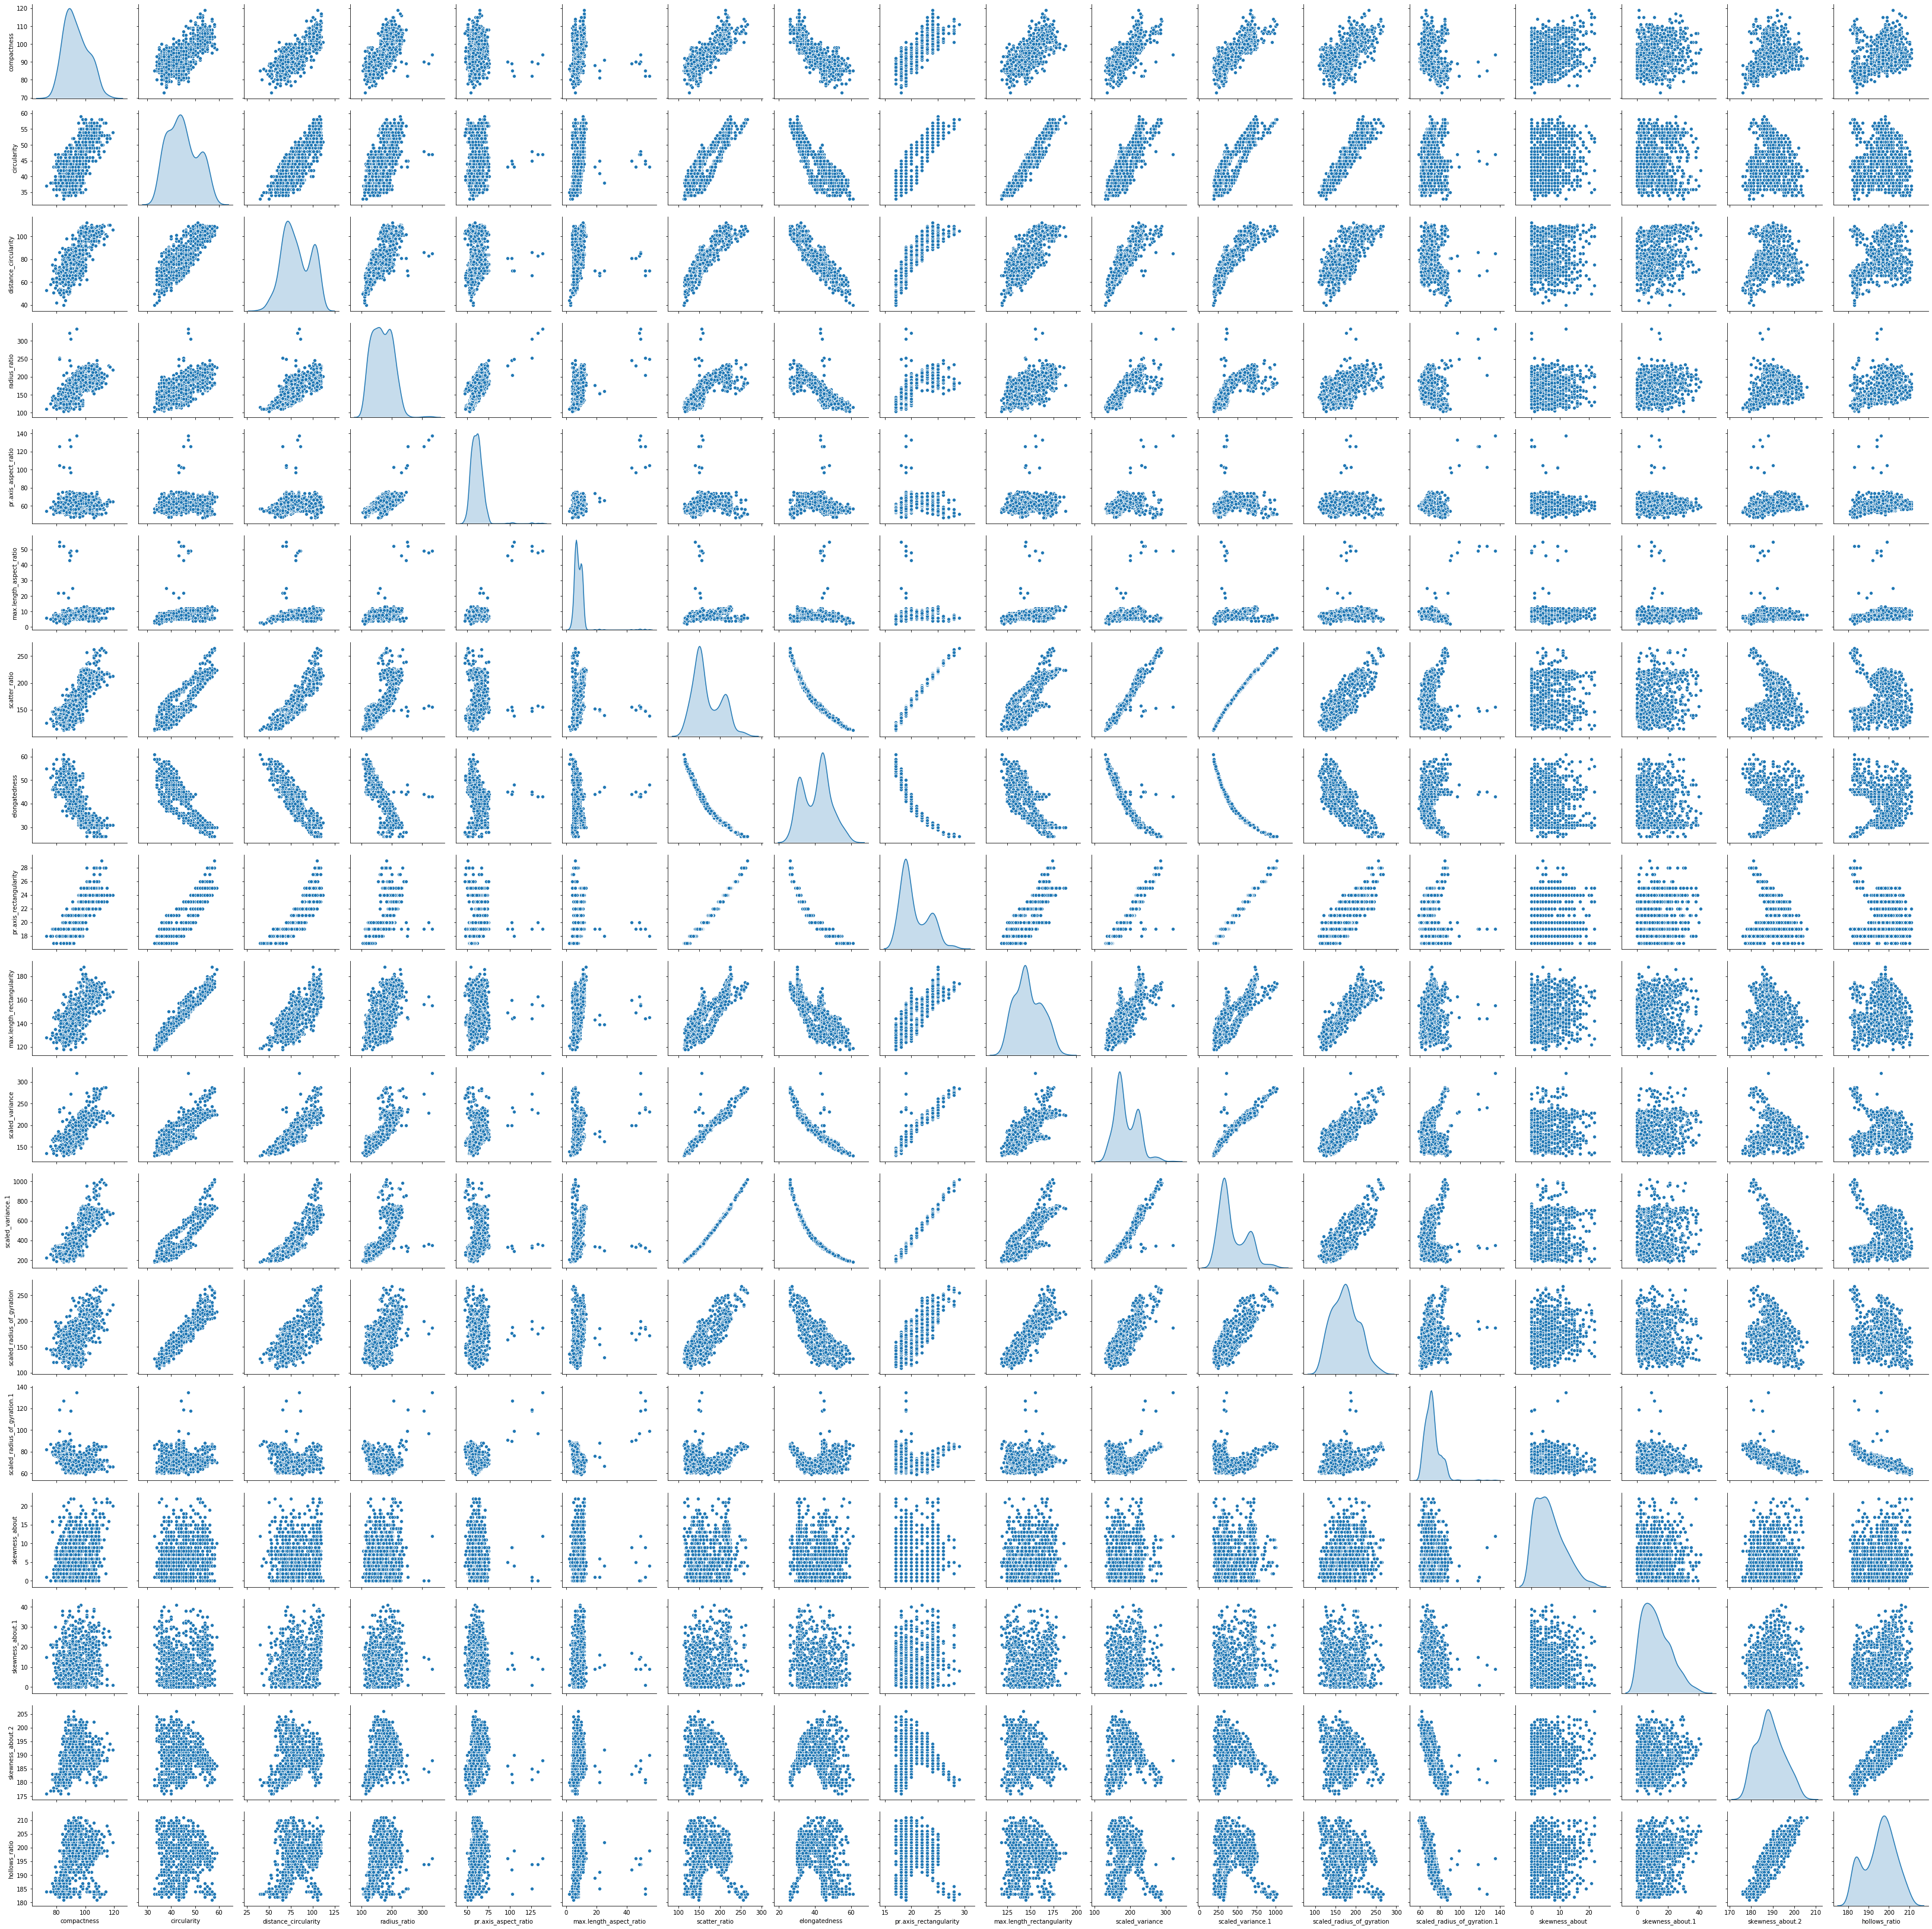

In [12]:
sns.pairplot(df, diag_kind='kde')

1. 'pr.axis_rectangularity','max.length_rectangularity','scaled_variance.1' variables have less correlation.
2. elongatedness is negatively correlated with other variables.
3. 'scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 4. 'scaled_radius_of_gyration'variables are highly correlated.
5. PCA is a way to deal with highly correlated variables, so there is no need to remove them.
6. If N variables are highly correlated than they will all load out on the SAME Principal Component (Eigenvector), not different ones. This is how you identify them as being highly correlated.
7. We are going to drop less correlated variables for PCA and join them before appling Support vector machines.

In [13]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [14]:
df['class']=df['class'].map({'car': 1, 'van' : 2, 'bus': 3})

Car(1) : 50.71 % is car
van(2) : 23.52 % is van
bus(3) : 25.77 % is bus


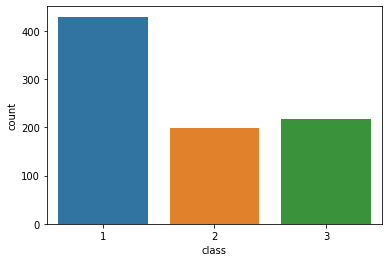

In [15]:
print ('Car(1) :', round(df['class'].value_counts()[1]/len(df)*100,2),'% is car')
print ('van(2) :', round(df['class'].value_counts()[2]/len(df)*100,2), '% is van')
print('bus(3) :', round(df['class'].value_counts()[3]/len(df)*100,2), '% is bus')
sns.countplot(df['class'])

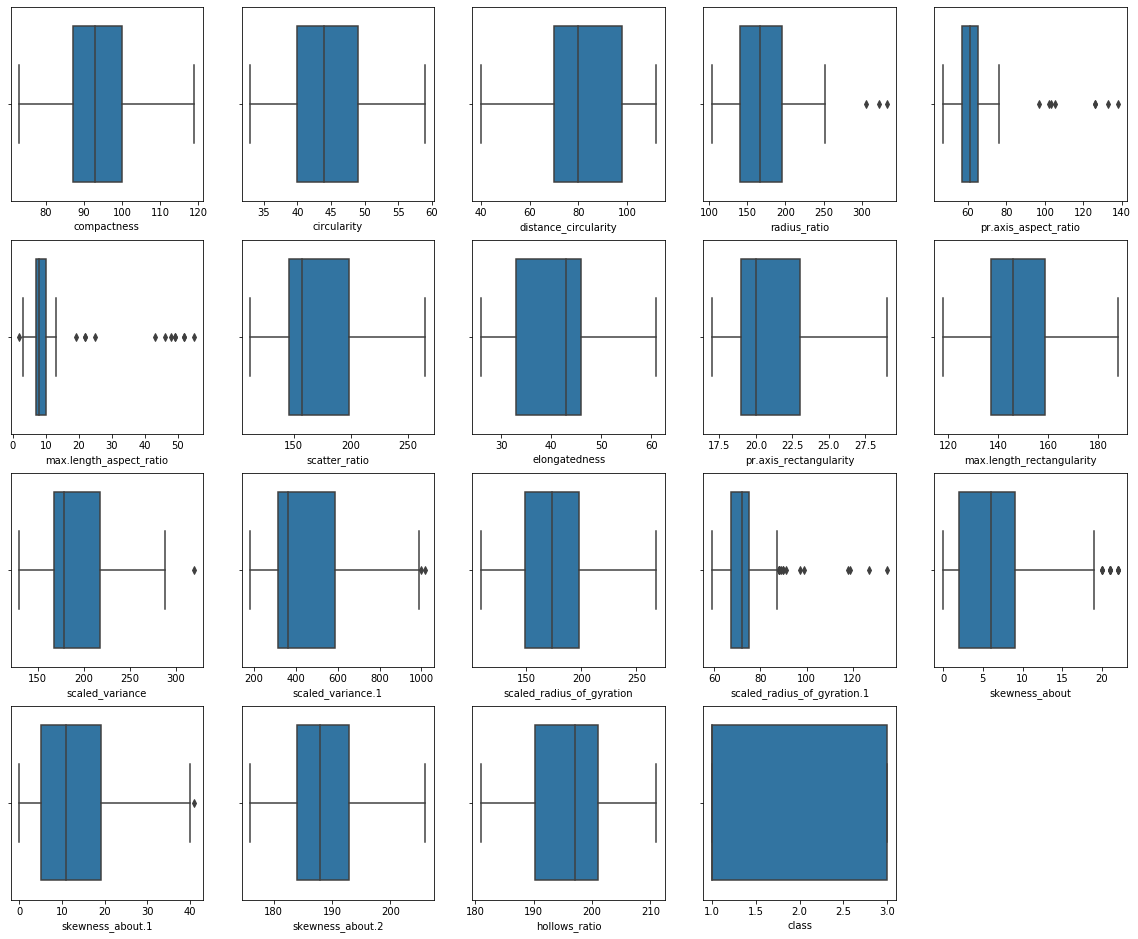

In [16]:
plt.figure(figsize=(20,25))
for i in range (len(df.columns)):
    plt.subplot(6,5, i+1)
    sns.boxplot(df[df.columns[i]], orient= 'h')

In [17]:
from scipy import stats

In [18]:
def get_outlier_counts(df, threshold):
  
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [19]:
stats.norm.ppf(0.999)

3.090232306167813

In [20]:
get_outlier_counts(df, 0.999)

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   3
pr.axis_aspect_ratio           8
max.length_aspect_ratio        9
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         1
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              3
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    6
skewness_about                 4
skewness_about.1               1
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [21]:
def remove_outliers(df, threshold):
    
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df = z_score_df > threshold_z_score
    
    # Get indices of the outliers
    outliers = z_score_df.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = df.index[outliers]
    
    # Drop outlier examples
    df = df.drop(outlier_indices, axis=0, inplace=True)
    
    return df

In [22]:
remove_outliers(df,0.999)

In [23]:
df.shape

(827, 19)

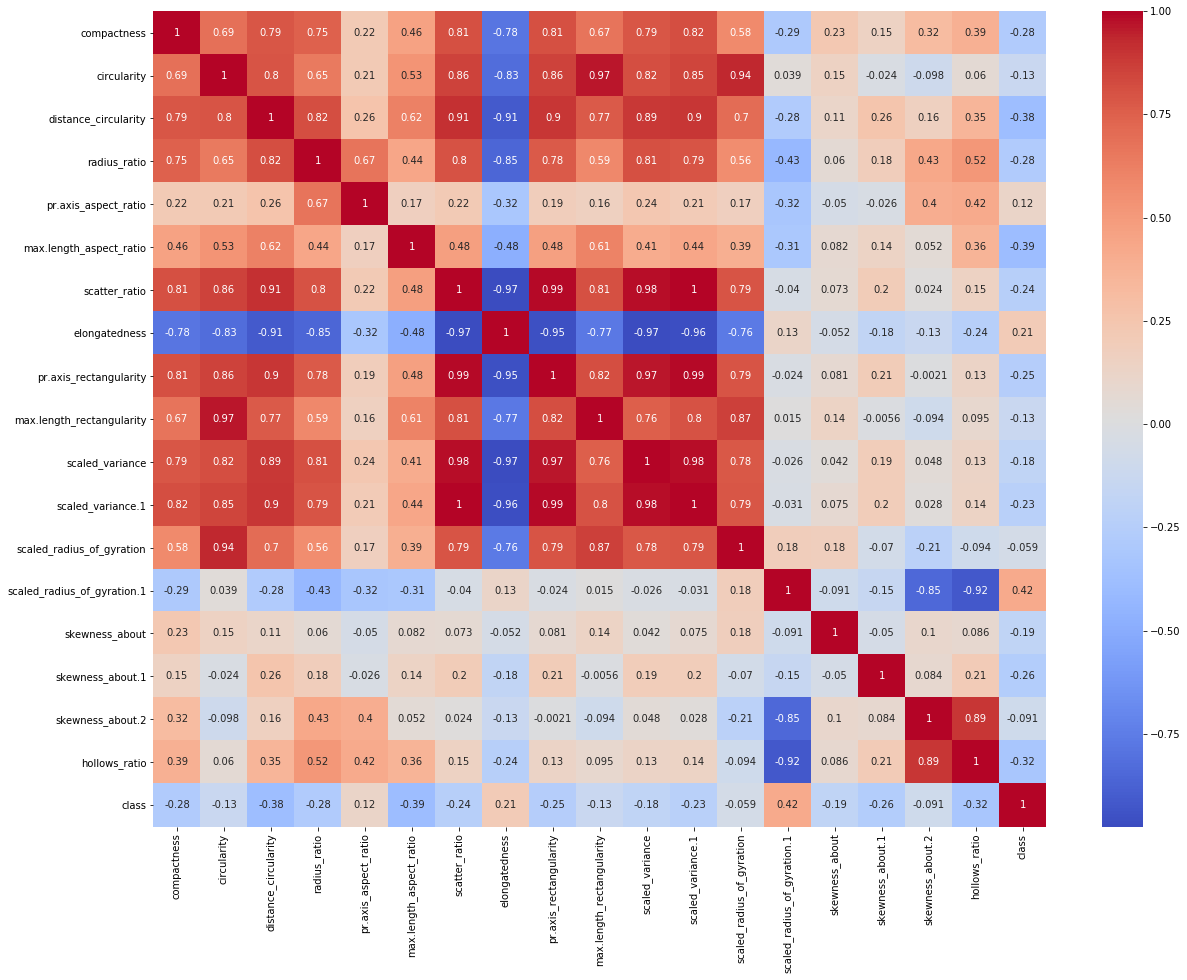

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot =True,  cmap ='coolwarm')

In [25]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_select = [column for column in upper.columns if any(upper[column] > 0.30) ]

In [26]:
to_select

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about.2',
 'hollows_ratio',
 'class']

In [27]:
df1 = df.loc[:,(df.columns.isin(to_select))]
df1=df1.drop('class' , axis=1)
df1.head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0         48.0                  83.0         178.0                  72.0   
1         41.0                  84.0         141.0                  57.0   
2         50.0                 106.0         209.0                  66.0   
3         41.0                  82.0         159.0                  63.0   
5         56.6                 106.0         172.0                  50.0   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                     10.0          162.0           42.0   
1                      9.0          149.0           45.0   
2                     10.0          207.0           32.0   
3                      9.0          144.0           46.0   
5                      6.0          255.0           26.0   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                    20.0                      159.0            176.0   
1                    19.0                      143.0            170.0   
2                    23.0                      158.0            223.0   
3                    19.0                      143.0            160.0   
5                    28.0                      169.0            280.0   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0              379.0                      184.0                         70.0   
1              330.0                      158.0                         72.0   
2              635.0                      220.0                         73.0   
3              309.0                      127.0                         63.0   
5              957.0                      264.0                         85.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
5             181.0          183.0

In [28]:
df2 = df[df.columns.difference(to_select)]
df2.head()

compactness  skewness_about  skewness_about.1
0         95.0             6.0              16.0
1         91.0             9.0              14.0
2        104.0            14.0               9.0
3         93.0             6.0              10.0
5        107.0             5.0               9.0

In [29]:
# split data table into data X and class labels y
X=df1
y=df['class']

# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          

# Covariance matrix 
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00121065  0.79749786  0.6520739   0.21437606  0.53327328  0.85934589
  -0.82652643  0.85752459  0.96748187  0.81925218  0.852629    0.93642139
   0.03877827 -0.09853287  0.06002258]
 [ 0.79749786  1.00121065  0.82021473  0.26075012  0.62257089  0.91173516
  -0.91319299  0.90069749  0.77393271  0.89237429  0.89636414  0.70430983
  -0.28073934  0.16019599  0.3526921 ]
 [ 0.6520739   0.82021473  1.00121065  0.67280818  0.44379876  0.80258898
  -0.85274467  0.77607145  0.58825807  0.80821964  0.79415633  0.56167249
  -0.42757783  0.43393174  0.52014033]
 [ 0.21437606  0.26075012  0.67280818  1.00121065  0.168448    0.22055996
  -0.31870118  0.18787533  0.16233328  0.23990137  0.2093245   0.17186762
  -0.32166069  0.40292787  0.41559467]
 [ 0.53327328  0.62257089  0.44379876  0.168448    1.00121065  0.47802547
  -0.48213116  0.4758835   0.61483394  0.40846995  0.44377935  0.39483945
  -0.30595798  0.05195944  0.36334433]
 [ 0.85934589  0.91173516  0.80258898  0.22

In [30]:
# Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-3.01015479e-01 -1.28613376e-01  1.01577450e-01  1.88572628e-01
  -4.02811502e-01  1.50683313e-04 -1.64247699e-01  6.84938104e-02
  -9.45105347e-02 -2.36297513e-02 -1.90340121e-01 -6.92070301e-01
  -3.14786917e-01 -1.70411375e-01  1.52551500e-02]
 [-3.12145062e-01  5.22290294e-02  1.18937162e-01 -1.05481680e-01
   1.89899518e-01 -4.52232769e-01 -1.39019134e-01 -7.16225536e-01
  -1.24052191e-01  1.41090097e-02  2.94219556e-02  7.60214075e-03
  -1.30081709e-01  8.42262585e-02 -2.47298899e-01]
 [-2.84731564e-01  2.12198479e-01 -2.79741300e-01  8.56016699e-02
   1.56482984e-01 -1.30451686e-01 -1.75113135e-02  2.13468035e-01
  -1.04013014e-01  3.04980216e-02 -1.89056975e-02  2.20492864e-01
  -3.38829270e-02 -7.73066465e-01 -2.03553209e-01]
 [-1.12051069e-01  2.69762521e-01 -5.47014140e-01  6.68901060e-01
   1.26831853e-01  1.82524902e-02 -9.74353648e-02 -6.23812532e-02
   5.02179129e-02 -1.97709557e-02  1.46603073e-02 -6.84517001e-02
   3.13701799e-02  3.58621548e-01  2.

In [31]:
#Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.120204372224652, array([-0.30101548, -0.31214506, -0.28473156, -0.11205107, -0.19312649,
       -0.32225644,  0.32062   , -0.3187498 , -0.28880083, -0.31521445,
       -0.31919019, -0.27521997,  0.05328359, -0.03840575, -0.08985176])), (3.273386935735215, array([-0.12861338,  0.05222903,  0.21219848,  0.26976252,  0.08570998,
       -0.06509817,  0.00270347, -0.07919126, -0.11691062, -0.06169967,
       -0.06926983, -0.20019139, -0.50975059,  0.51173227,  0.51088428])), (0.9777837273247442, array([ 0.10157745,  0.11893716, -0.2797413 , -0.54701414,  0.63716106,
       -0.06291208,  0.10900926, -0.03918231,  0.24035157, -0.14829045,
       -0.08426246, -0.00884045, -0.22659813, -0.08009864,  0.17322278])), (0.7699738349294446, array([ 0.18857263, -0.10548168,  0.08560167,  0.66890106,  0.41474759,
       -0.18027249,  0.13820178, -0.19096793,  0.2237368 , -0.21915759,
       -0.20911163,  0.18379008,  0.10917434, -0.21834057, -0.05735139])), (0.44010306629840157, array([-0.4028115 ,

Cumulative Variance Explained [ 60.72784209  82.52403402  89.03471003  94.16166197  97.09213462
  98.00230898  98.6189496   99.03716741  99.37237764  99.61268971
  99.76414668  99.87220633  99.95643732  99.99729001 100.        ]


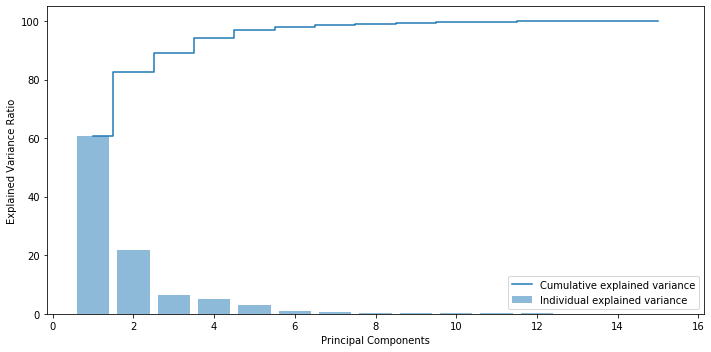

In [32]:
total = sum(eigenvalues)
var_exp = [( i /total ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Largest eigen value we can retain 60.72% variance, considering eigen vectors corresponding to top 4 eigen values we can retain 94.16 % variance. For data compression purpose, we generally go for 99% variance retention, while for visualization we make the dimension  5. Now a reduction matrix of k eigen vectors corresponding to top k eigen values will be formed. Here, k is set to 5 which covers approximately 97% of the variance. Then the n-dimensional feature space is transformed to k-dimensional feature subspace via reduction matrix

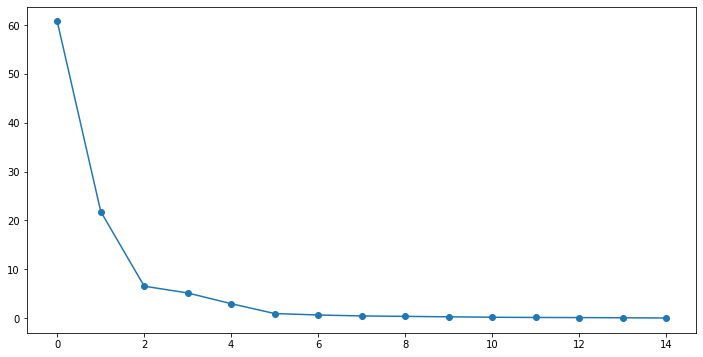

In [33]:
# Plotting Elbow/ Scree Plot
plt.figure(figsize=(12,6))
plt.plot( var_exp, marker = "o" )

In [34]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
df_reduced = pca.fit_transform(X_std)
df_reduced.transpose()

array([[-0.56626741,  1.52625006, -3.7365912 , ..., -5.04496918,
         3.19532041,  4.86923619],
       [-0.61251887, -0.2856512 ,  0.26409883, ..., -0.21710764,
        -0.99659738,  0.47058037],
       [ 0.11461091, -1.09692457,  0.39833343, ..., -0.33058636,
        -0.26569904, -0.0801264 ],
       [ 2.24542795, -0.18675651,  0.43294399, ...,  0.76889327,
        -0.57684071, -0.57599098],
       [-0.06324622,  0.18922896,  0.40096469, ...,  0.63415572,
         0.37101033, -0.10494867]])

In [35]:
pca.components_

array([[-0.30101548, -0.31214506, -0.28473156, -0.11205107, -0.19312649,
        -0.32225644,  0.32062   , -0.3187498 , -0.28880083, -0.31521445,
        -0.31919019, -0.27521997,  0.05328359, -0.03840575, -0.08985176],
       [ 0.12861338, -0.05222903, -0.21219848, -0.26976252, -0.08570998,
         0.06509817, -0.00270347,  0.07919126,  0.11691062,  0.06169967,
         0.06926983,  0.20019139,  0.50975059, -0.51173227, -0.51088428],
       [-0.10157745, -0.11893716,  0.2797413 ,  0.54701414, -0.63716106,
         0.06291208, -0.10900926,  0.03918231, -0.24035157,  0.14829045,
         0.08426246,  0.00884045,  0.22659813,  0.08009864, -0.17322278],
       [ 0.18857263, -0.10548168,  0.08560167,  0.66890106,  0.41474759,
        -0.18027249,  0.13820178, -0.19096793,  0.2237368 , -0.21915759,
        -0.20911163,  0.18379008,  0.10917434, -0.21834057, -0.05735139],
       [-0.4028115 ,  0.18989952,  0.15648298,  0.12683185,  0.45640719,
         0.11915524, -0.12744242,  0.11149961, 

In [36]:
df_pca = pd.DataFrame(df_reduced,columns=['PC1','PC2','PC3','PC4', 'PC5'])
df_pca

PC1       PC2       PC3       PC4       PC5
0   -0.566267 -0.612519  0.114611  2.245428 -0.063246
1    1.526250 -0.285651 -1.096925 -0.186757  0.189229
2   -3.736591  0.264099  0.398333  0.432944  0.400965
3    1.550048 -3.032694 -0.813337 -0.020517 -0.031344
4   -5.901498  4.883906  0.725192 -2.683698 -0.656613
..        ...       ...       ...       ...       ...
822  0.434855 -0.510372  0.792762 -0.240726  1.372269
823 -0.107337 -0.131445 -0.843907  1.705755  0.232446
824 -5.044969 -0.217108 -0.330586  0.768893  0.634156
825  3.195320 -0.996597 -0.265699 -0.576841  0.371010
826  4.869236  0.470580 -0.080126 -0.575991 -0.104949

[827 rows x 5 columns]

In [37]:
# Now we will join the rest of the features with our principal components

final_df = df2.join(df_pca)
final_df.head()

compactness  skewness_about  skewness_about.1       PC1       PC2  \
0         95.0             6.0              16.0 -0.566267 -0.612519   
1         91.0             9.0              14.0  1.526250 -0.285651   
2        104.0            14.0               9.0 -3.736591  0.264099   
3         93.0             6.0              10.0  1.550048 -3.032694   
5        107.0             5.0               9.0  0.878538 -2.314341   

        PC3       PC4       PC5  
0  0.114611  2.245428 -0.063246  
1 -1.096925 -0.186757  0.189229  
2  0.398333  0.432944  0.400965  
3 -0.813337 -0.020517 -0.031344  
5  0.780096 -0.187512 -1.192595

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

parameter = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']},
]

# Create a classifier object with the classifier and parameter candidates
GSCV = GridSearchCV(estimator=svm.SVC(), param_grid=parameter, n_jobs=-1)

# Train the classifier on data1's feature and target data
GSCV.fit(df_reduced, y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}])

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=10)
score = cross_val_score(GSCV,df_reduced, y, cv=kfold, scoring='accuracy')
print(score)

[0.91566265 0.96385542 0.92771084 0.91566265 0.93975904 0.93975904
 0.90361446 0.91463415 0.96341463 0.92682927]


In [40]:
kfold = KFold(n_splits=10, random_state=10)
score = cross_val_score(GSCV,df_reduced, y, cv=kfold, scoring='accuracy')
print(score.mean())

0.9310902145166031


In [41]:
print('Best score :', GSCV.best_score_)

Best score : 0.9262139466958745


In [42]:
# View the best parameters 
print('Best C:',GSCV.best_estimator_.C) 
print('Best Kernel:',GSCV.best_estimator_.kernel)

Best C: 1
Best Kernel: rbf


We are getting Acuuracy of 93% when we do PCA while droping low correlated features.


Dropping low correlated attributes is upto 5 components (which covers more than 95% of the variance).

# Batting_bowling_ipl

In [113]:
sports = pd.read_csv(r'C:\Users\RKRIS\Downloads\batting_bowling_ipl_bat.csv')

In [114]:
sports.head(90)

Name   Runs    Ave      SR  Fours  Sixes   HF
0             NaN    NaN    NaN     NaN    NaN    NaN  NaN
1        CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2             NaN    NaN    NaN     NaN    NaN    NaN  NaN
3       G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4             NaN    NaN    NaN     NaN    NaN    NaN  NaN
..            ...    ...    ...     ...    ...    ...  ...
85  Azhar Mahmood  186.0  23.25  130.98   16.0    8.0  0.0
86            NaN    NaN    NaN     NaN    NaN    NaN  NaN
87      MK Pandey  143.0  20.42  127.67   12.0    6.0  1.0
88            NaN    NaN    NaN     NaN    NaN    NaN  NaN
89    S Badrinath  196.0  28.00  108.28   23.0    2.0  1.0

[90 rows x 7 columns]

In [115]:
sports.shape

(180, 7)

In [116]:
sports.isna().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [117]:
sports.dropna(inplace= True)

In [125]:
sports.drop('Name', axis =1, inplace =True)

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(sports[['Runs']])
sports['Runss']= scaler.transform(sports[['Runs']])

scaler.fit(sports[['Ave']])
sports['Ave']= scaler.transform(sports[['Ave']])

scaler.fit(sports[['SR']])
sports['SR']= scaler.transform(sports[['SR']])

scaler.fit(sports[['Fours']])
sports['Fours']= scaler.transform(sports[['Fours']])

scaler.fit(sports[['Sixes']])
sports['Sixes']= scaler.transform(sports[['Sixes']])

scaler.fit(sports[['HF']])
sports['HF']= scaler.transform(sports[['HF']])

In [127]:
sports.head()

Runs       Ave        SR     Fours     Sixes        HF     Runss
1  733.0  0.749474  0.976974  0.630137  1.000000  1.000000  1.000000
3  590.0  0.449957  0.859169  0.876712  0.288136  0.666667  0.804378
5  495.0  0.402078  0.980332  0.780822  0.322034  0.555556  0.674419
7  479.0  0.532476  0.901179  0.561644  0.338983  0.555556  0.652531
9  569.0  0.496598  0.763638  0.794521  0.305085  0.555556  0.775650

In [128]:
from sklearn.cluster import KMeans

In [129]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [132]:
predicted=km.fit_predict(sports)
sports['cluster']=predicted
sports.head(1)

Runs       Ave        SR     Fours  Sixes   HF  Runss  cluster
1  733.0  0.749474  0.976974  0.630137    1.0  1.0    1.0        3

In [133]:
sports1 = sports[sports.cluster==0]
sports2 = sports[sports.cluster==1]
sports3 = sports[sports.cluster==3]
sports4 = sports[sports.cluster==4]

In [134]:
sse = []

k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sports)
    sse.append(km.inertia_)    
sse

[2173041.394206312,
 716815.2148047441,
 347230.54252252396,
 191488.55325138278,
 128346.94477638825,
 79183.06956492385,
 58495.38729271507,
 39294.67896269572,
 29459.15522744895,
 21245.881774422913]

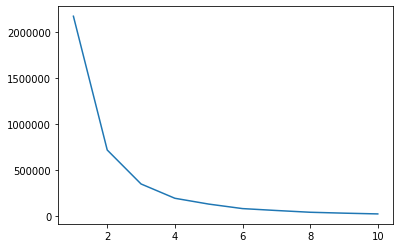

In [135]:
plt.xlabel="k"
plt.ylabel="sum_squared_errors"
plt.plot(k_range,sse)

In [142]:
actualdata = pd.read_csv(r'C:\Users\RKRIS\Downloads\batting_bowling_ipl_bat.csv')

In [143]:
actualdata.dropna(inplace= True)

In [144]:
actualdata['cluster']=predicted

In [145]:
actualdata.head()

Name   Runs    Ave      SR  Fours  Sixes   HF  cluster
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0        3
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0        3
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0        3
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0        3
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0        3

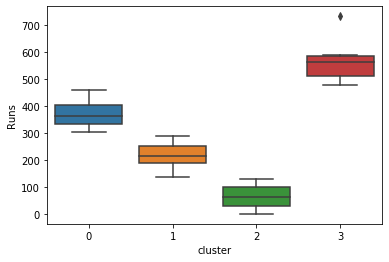

In [154]:
sns.boxplot(x='cluster', y='Runs', data=actualdata)

1. We can clearly see from the above boxplot that the players having max runs are in cluster 3 obvious its have batsmans.
2. we can see in cluster 0 there are also players having good runs in this cluster there might be playing less or mid order batsmans.
3. And in cluster 1 and 2 there are players dont have much runs
4. lets view other boxplots might be some changes.

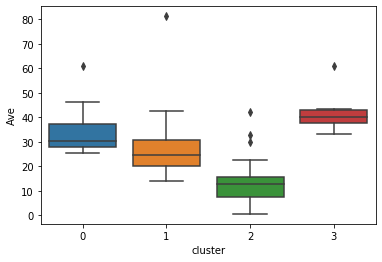

In [155]:
sns.boxplot(x='cluster', y='Ave', data=actualdata)

1. when we compare clusters with Average, we can see in cluster 3 mostly players are scoreing  average above 40 every match therefore we can say in cluster 3 we have good batsman
2. Here cluster 0 also have players scoreing around 30 every match we can say that in cluster 0 we have batsman to but not as good as in cluster 3.
3. cluster 1 and 2 are almost performing the same as above there for there might be bowlers and all rounders in 1 and 2 cluster

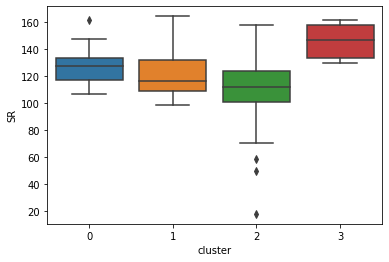

In [156]:
sns.boxplot(x='cluster', y='SR', data=actualdata)

1. when we compare strike rate we can se almost all the players have SR above 100 and the cluster 3 have players with max strike rate.
2. cluster 0 shows SR around 130 its has batsman and the boxplot behaviour till now for cluster 0 tells its has average performing batsman
3. this time cluster 1 is showing players with SR around 120 and no outliers like in cluster 2 there batsman in cluster 1 are still better than cluster 2

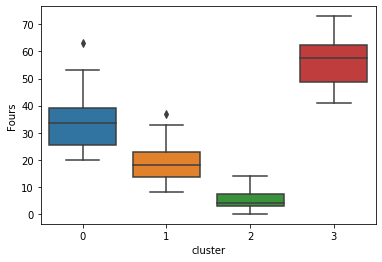

In [162]:
sns.boxplot(x='cluster', y='Fours', data=actualdata)

Most of the Fours are scored by the players in cluster 3 and 0

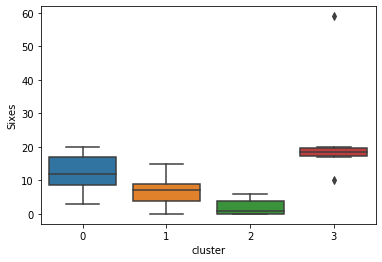

In [157]:
sns.boxplot(x='cluster', y='Sixes', data=actualdata)

Similarly here most of the sixs are scored by the players in cluster 3 and 0

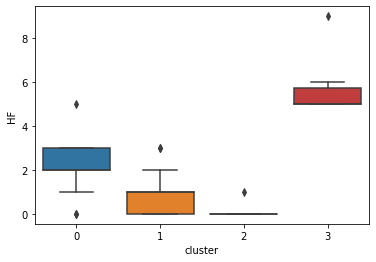

In [153]:
sns.boxplot(x='cluster', y='HF', data=actualdata)

Similarly here half centuries(HF) are mostly scored by players in cluster 3 than in 0 than in 1 and almost 0 in 2 

So here we conclude that the best batsman we are having are in cluster 3, Ave performing batsman are in cluster 0 where we can have some allrounders also. players in cluster 1 and 2 are not performing well

In [159]:
actualdata1 = actualdata[actualdata.cluster==0]
actualdata2 = actualdata[actualdata.cluster==1]
actualdata3 = actualdata[actualdata.cluster==3]
actualdata4 = actualdata[actualdata.cluster==4]

clusters are individually distributed in variables so we can further plot the variables individualy to se the performance of individual player